In [1]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Multiply, Add
from keras.optimizers import Adam, Nadam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import shuffle
import pandas as pd
import random

#Keras build
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda, Layer
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

#cation data
cations = pd.read_csv('../data/cations.csv')
cations = cations['smiles_string']
salts = pd.read_csv('../data/salts.csv')
salts = salts['smiles_string']
categories = pd.read_csv('../data/categories.csv')
categories = categories['category']
coldic = pd.read_csv('../data/coldic.csv')
coldic = coldic.to_dict(orient='records')[0]
salt_coldic = pd.read_csv('../data/salt_coldic.csv')
salt_coldic = salt_coldic.to_dict(orient='records')[0]
salt_categories = pd.read_csv('../data/salt_categories.csv')
salt_categories = salt_categories['category']
density_coldic = pd.read_csv('../data/density_coldic.csv')
density_coldic = density_coldic.to_dict(orient='records')[0]
density_categories = pd.read_csv('../data/density_categories.csv')
density_categories = density_categories['category']

#supporting functions
import sys
sys.path.insert(0, '../')
from scripts import *

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#training array info
smile_max_length = 105
import json
f = open("../data/salt_char_to_index.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

In [6]:
ls *history*density*

history_gen2_2mol_50mil_GDB17_5_2_density_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_density_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_density_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_density_vae_1_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_density_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_density_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_density_vae_1_epochs.json


In [13]:
list(history.keys())

['val_loss',
 'val_decoded_mean_loss',
 'val_qspr_loss',
 'val_decoded_mean_acc',
 'val_decoded_mean_mean_squared_error',
 'val_qspr_acc',
 'val_qspr_mean_squared_error',
 'loss',
 'decoded_mean_loss',
 'qspr_loss',
 'decoded_mean_acc',
 'decoded_mean_mean_squared_error',
 'qspr_acc',
 'qspr_mean_squared_error']

In [32]:
import os
histories = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if 'history' in filename:
            histories.append(filename)

history_gen2_2mol_50mil_GDB17_5_2_cpt_vae_100_epochs.json


history_gen2_2mol_50mil_GDB17_5_2_cpt_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_1_1.h5.json
history_gen2_2mol_50mil_GDB17_5_2_melting_point_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_density_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_1_2.h5.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2.h5.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_melting_point_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_thermal_conductivity_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_viscosity_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_density_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_cpt_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_3_2.h5.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_viscosity_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_thermal_conductivity_vae_100_epochs.json
history_gen2_2mol_50mil_GDB1

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cpt_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_cpt_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_viscosity_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_melting_point_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_4_2.h5.json
history_gen2_2mol_50mil_GDB17_5_2_thermal_conductivity_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_melting_point_vae_10_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_viscosity_vae_1_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_viscosity_vae_100_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_3_1.h5.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_melting_point_vae_1_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_cpt_vae_1_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_cat_5_2_density_vae_1_epochs.json
history_gen2_2mol_50mil_GDB17_5_2_mix_5_2_thermal_con

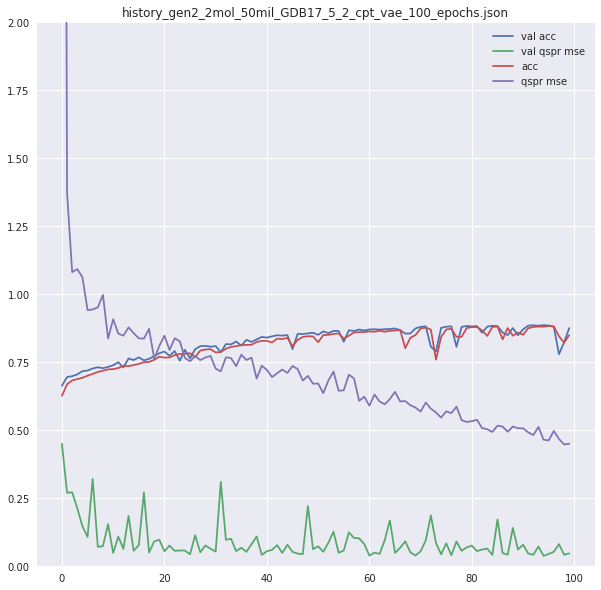

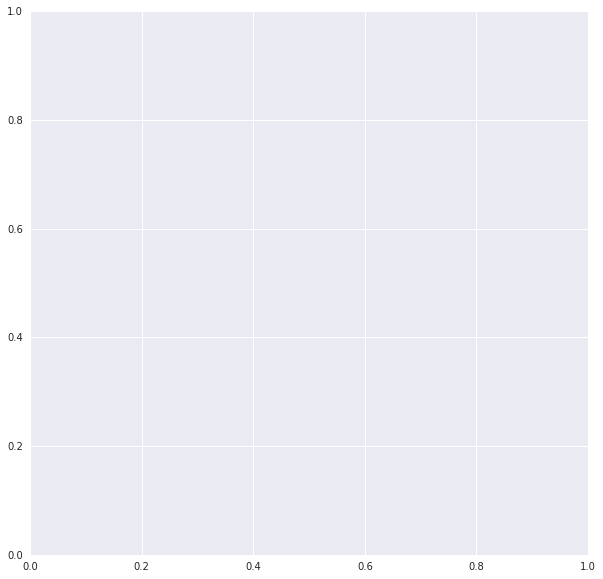

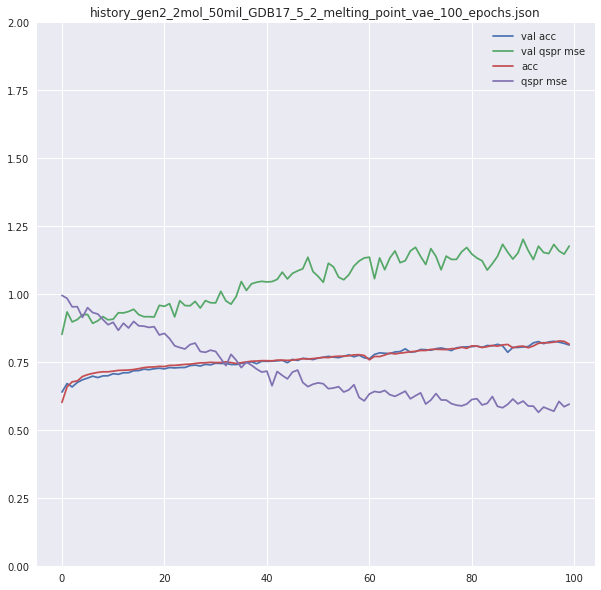

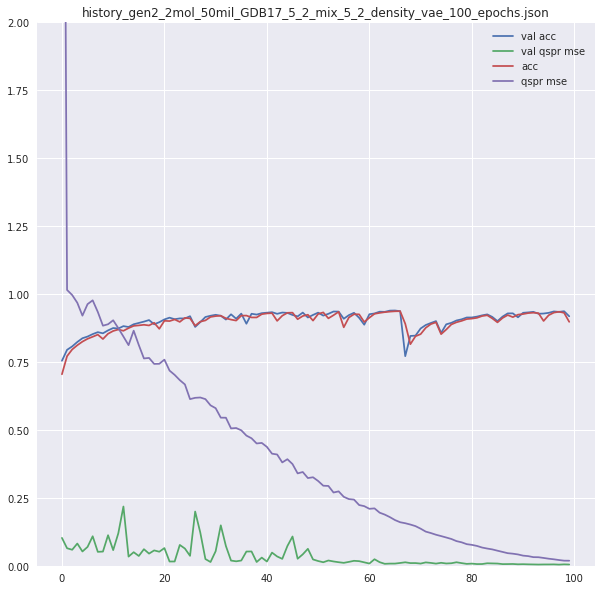

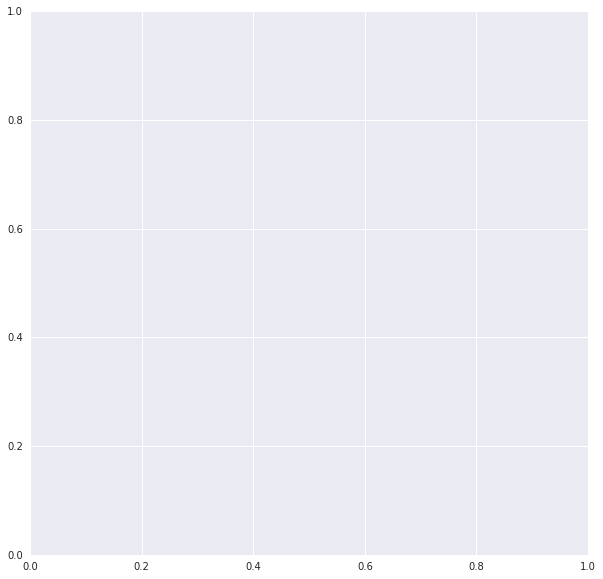

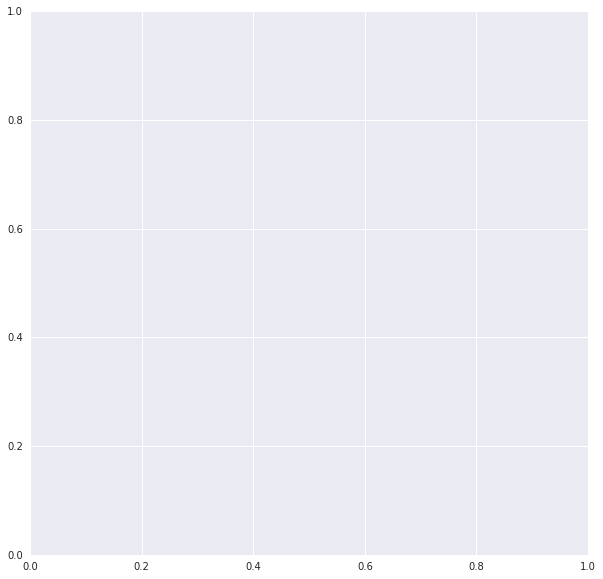

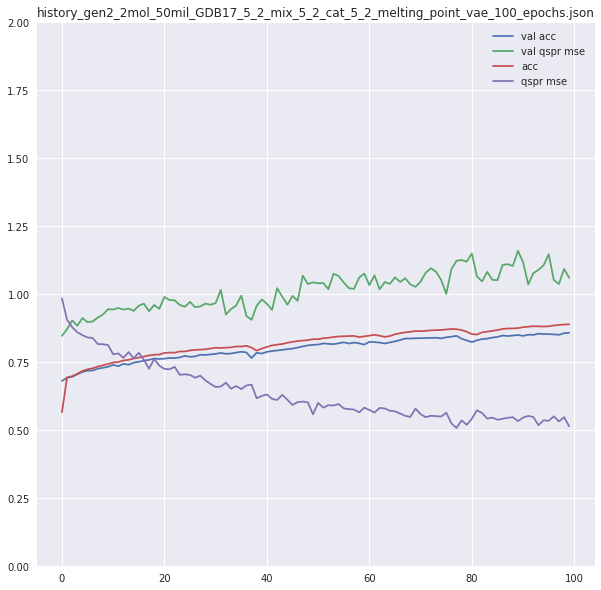

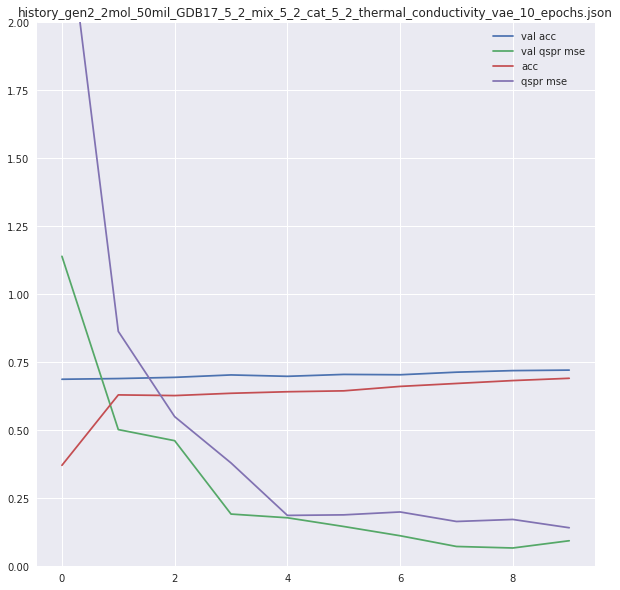

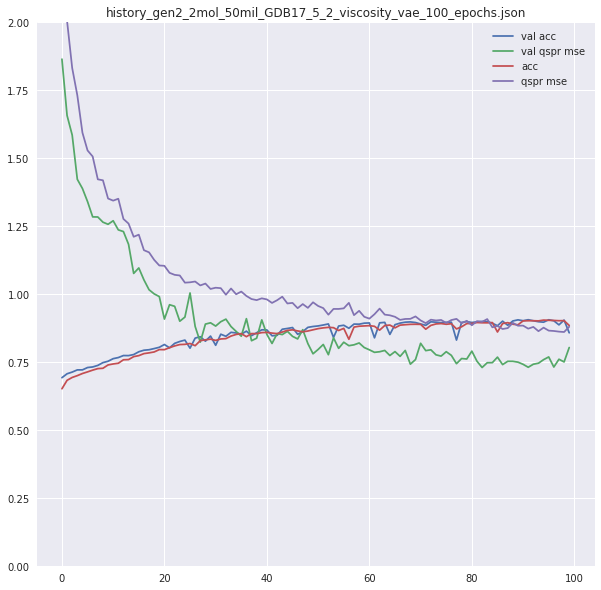

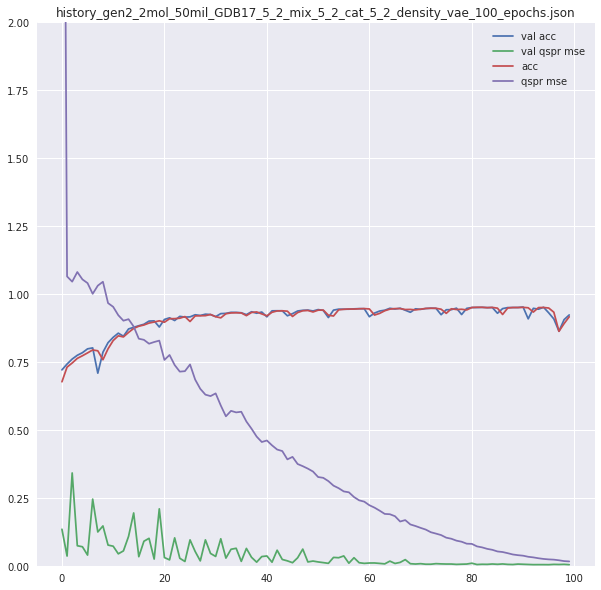

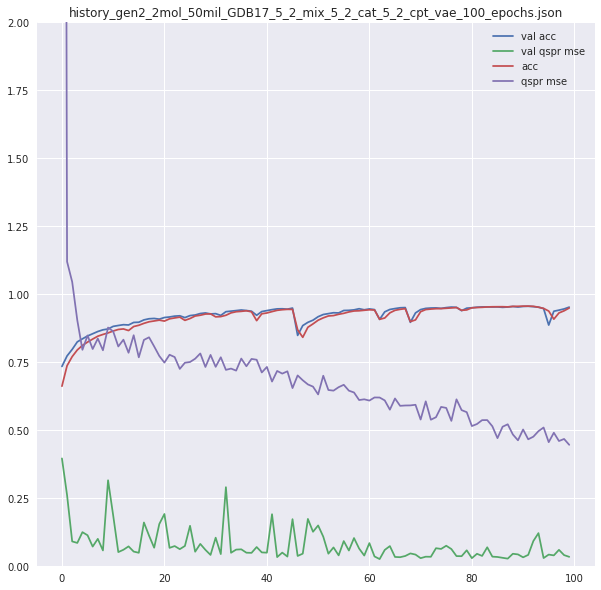

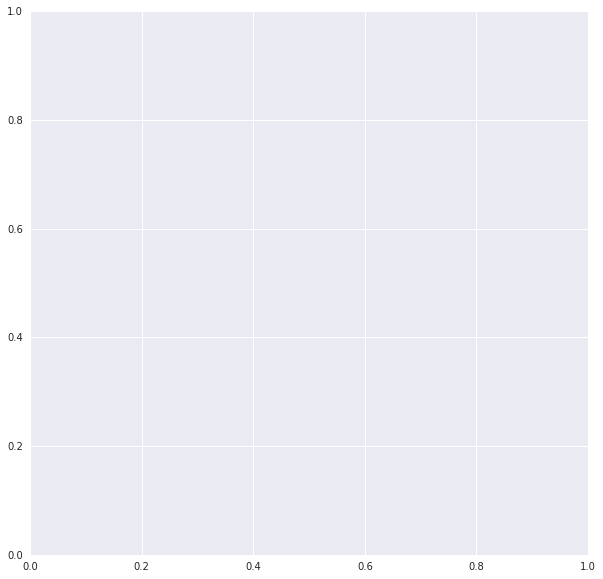

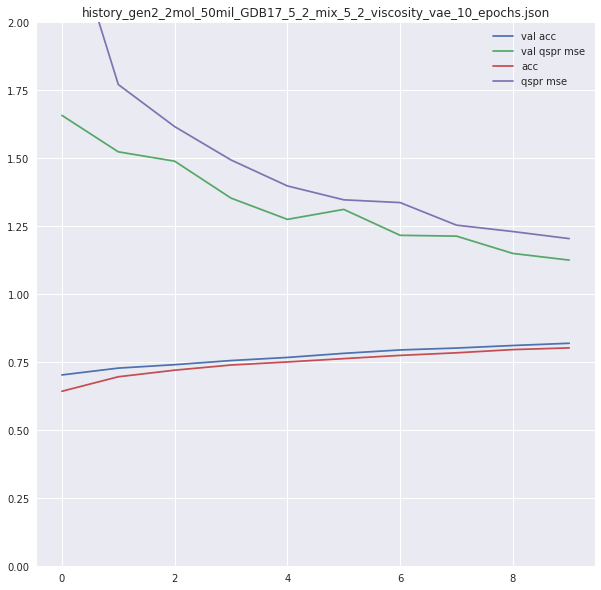

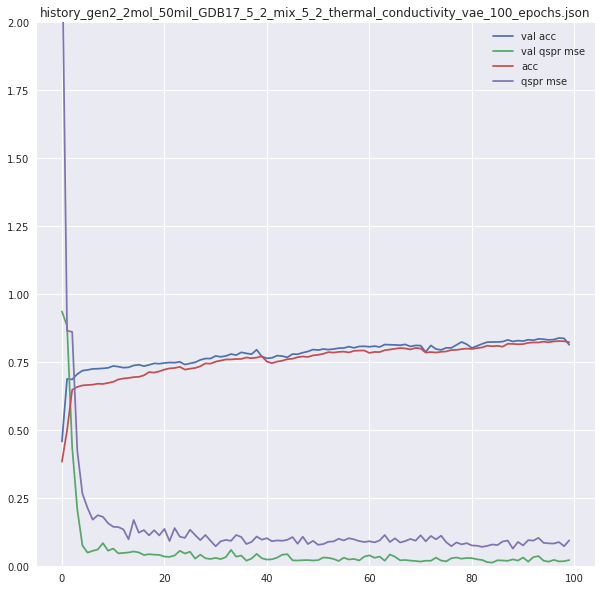

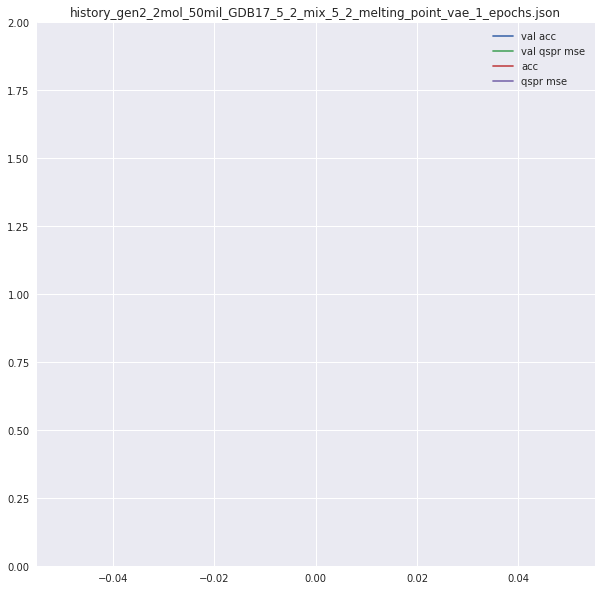

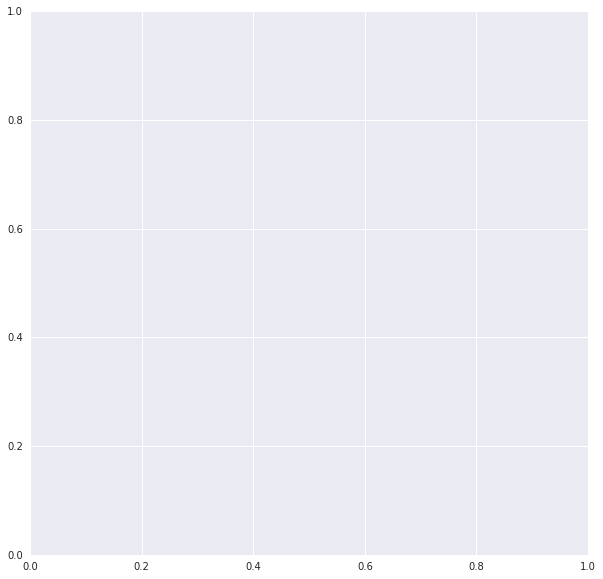

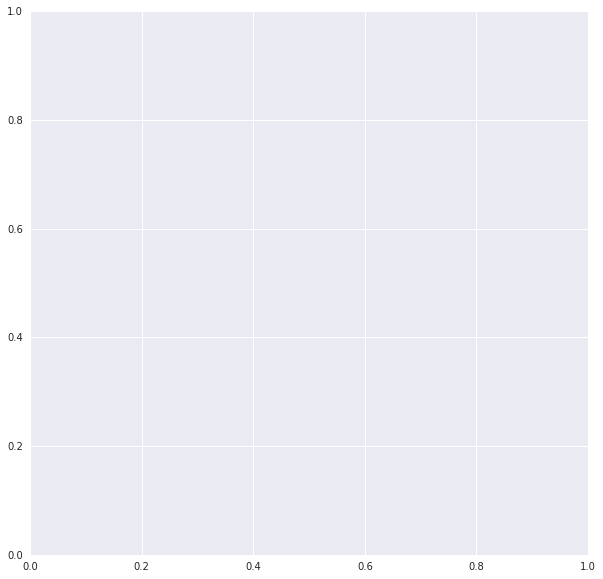

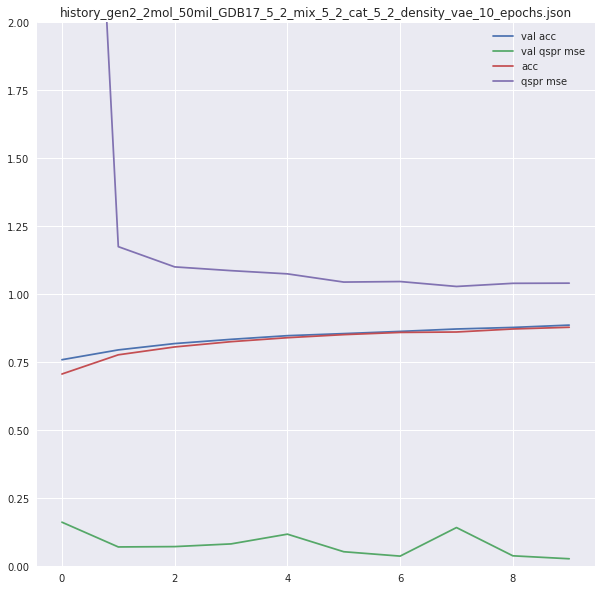

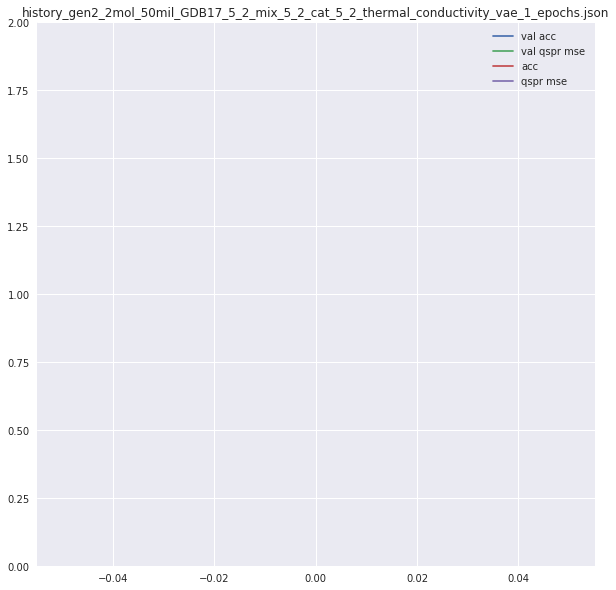

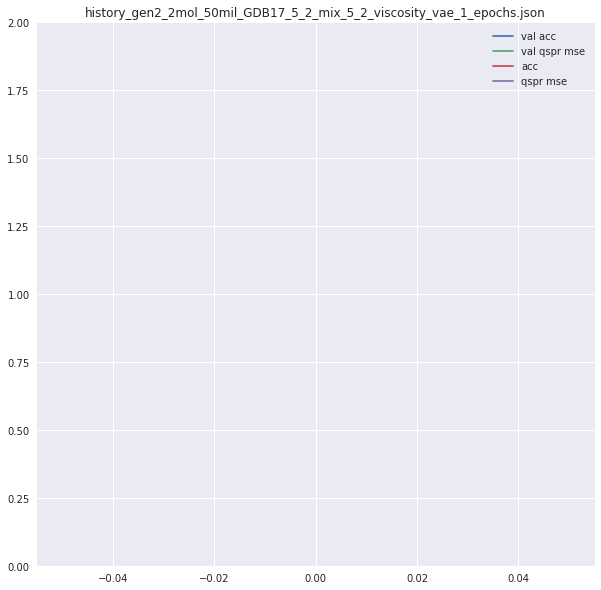

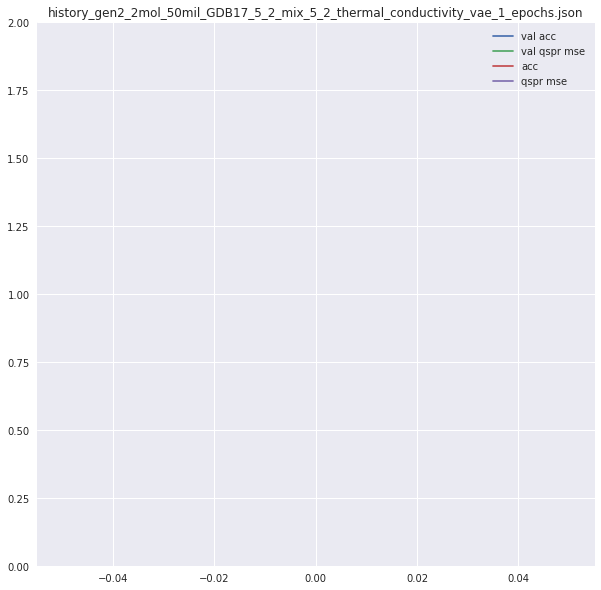

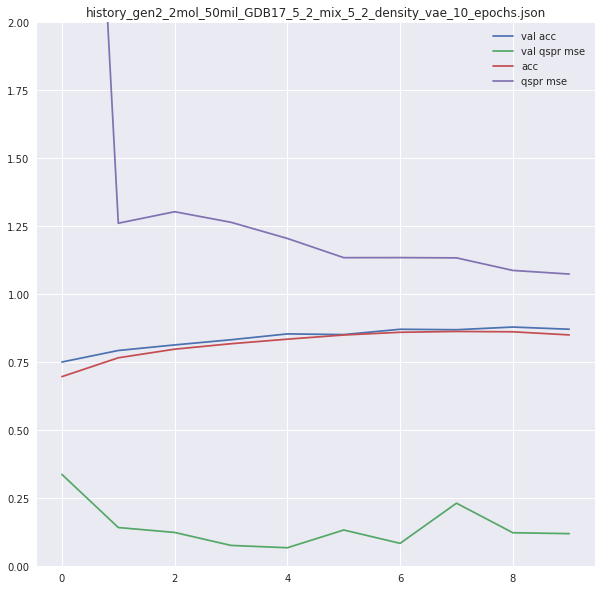

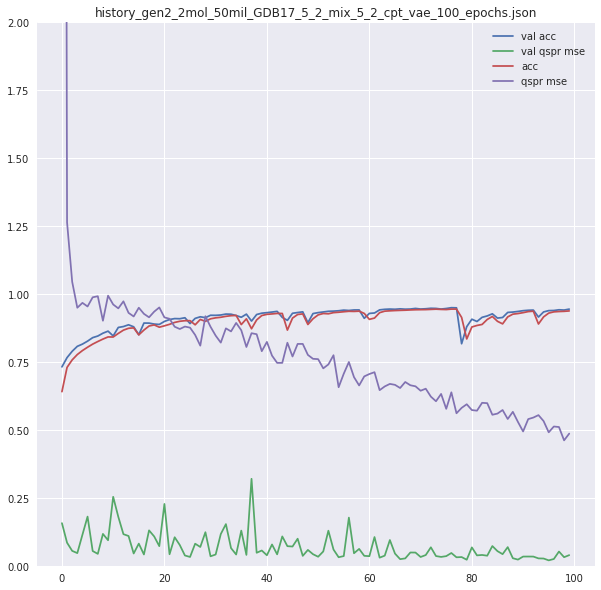

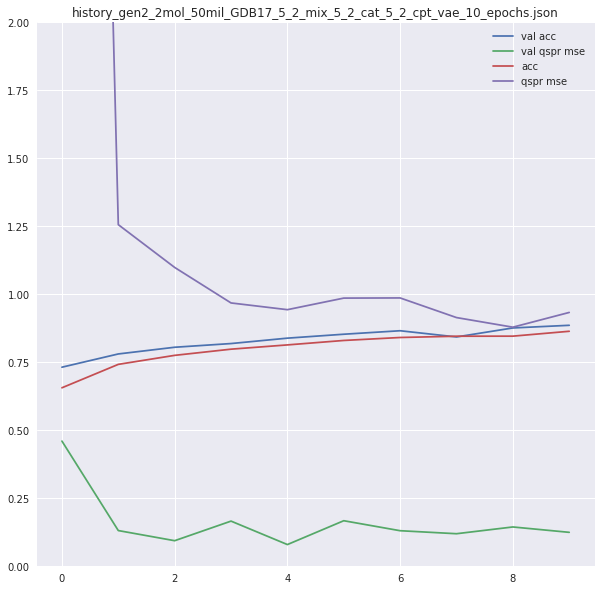

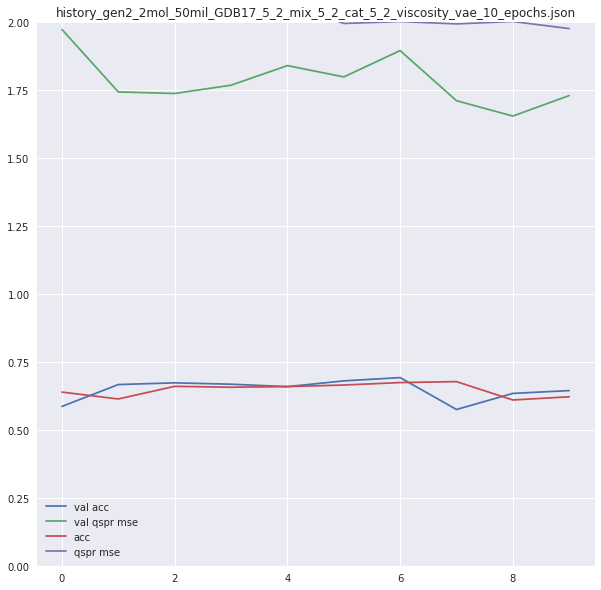

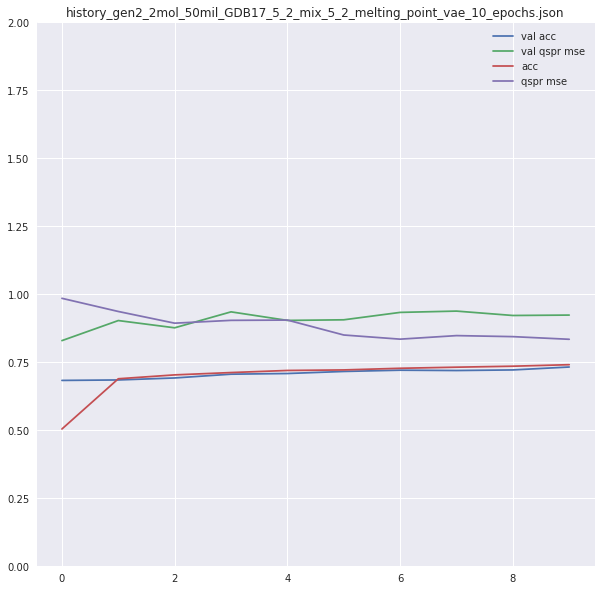

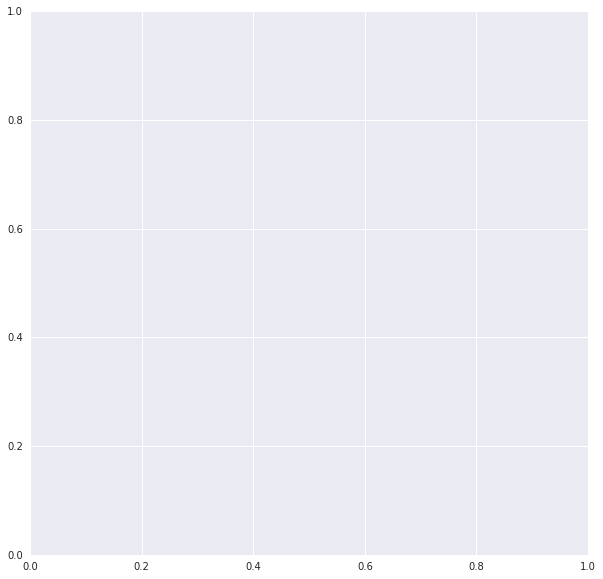

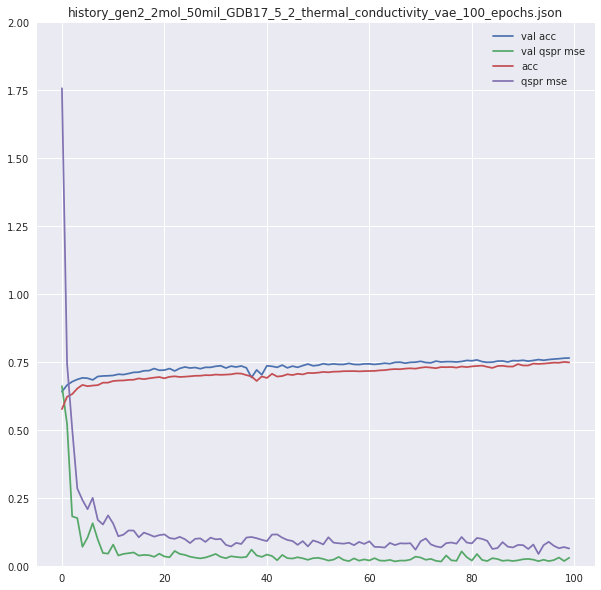

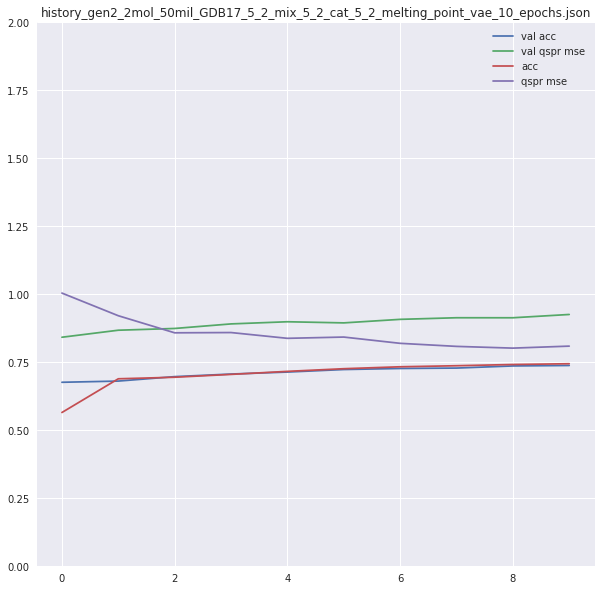

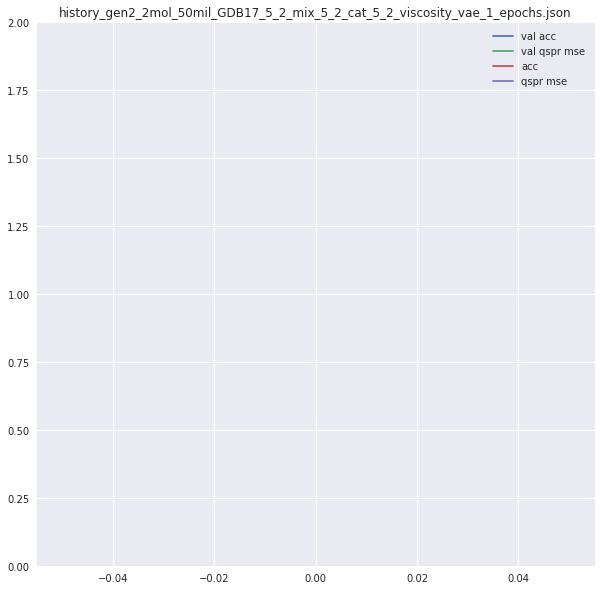

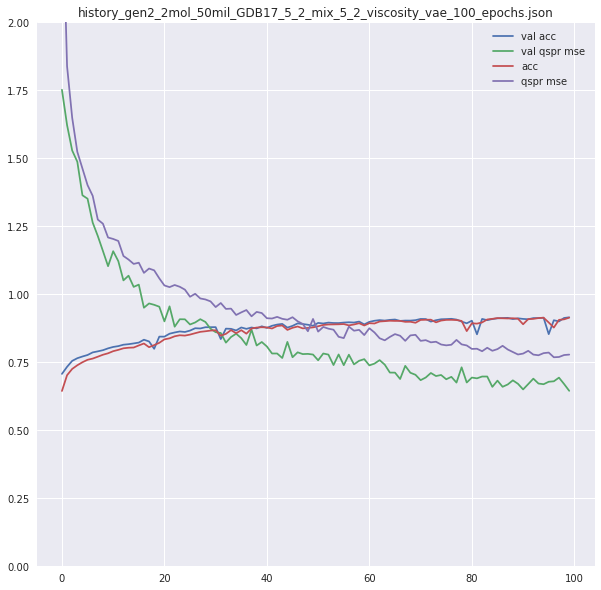

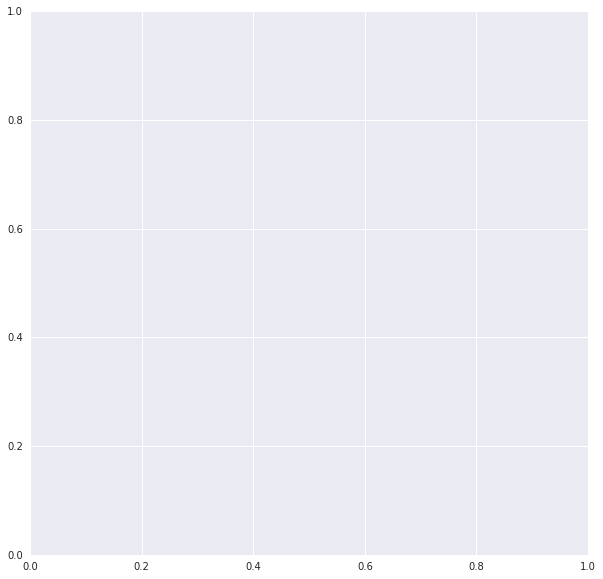

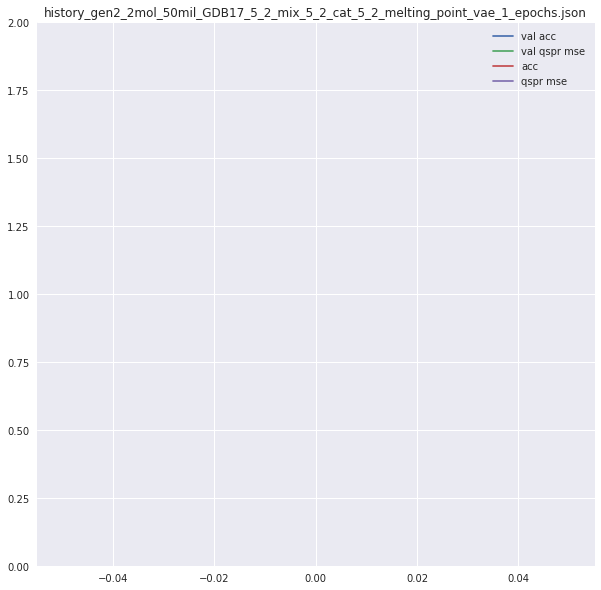

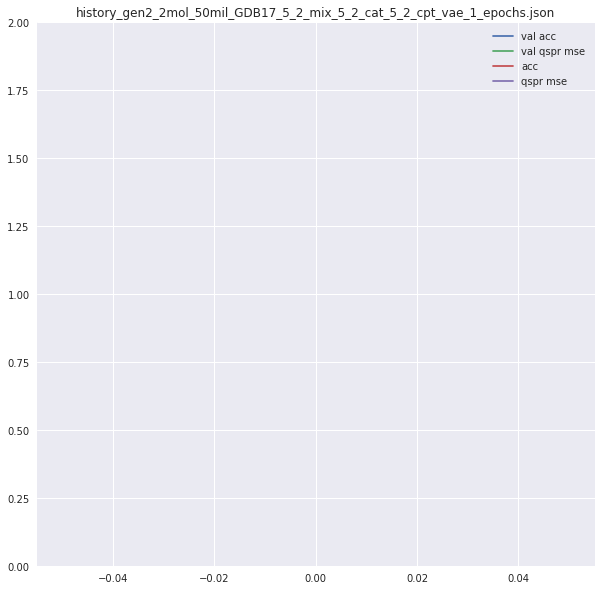

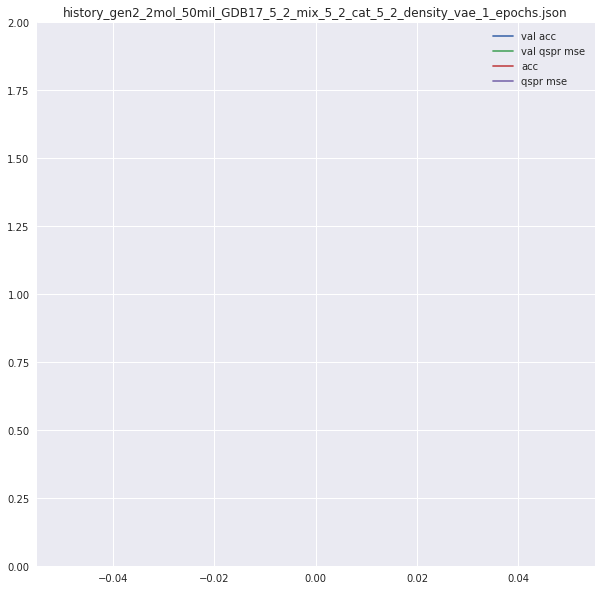

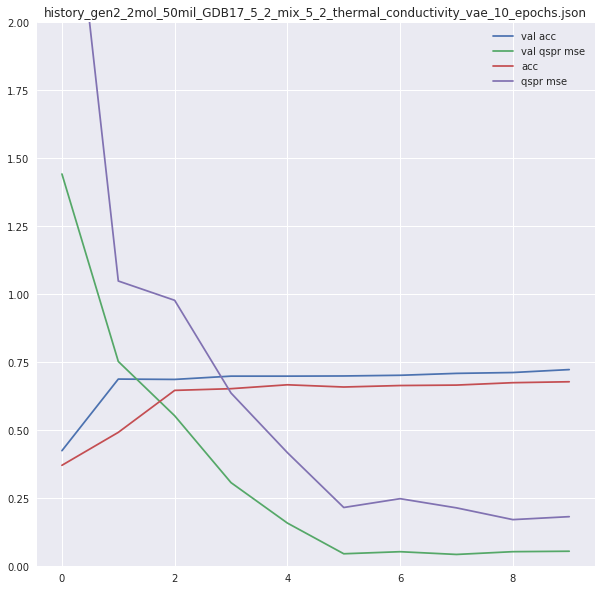

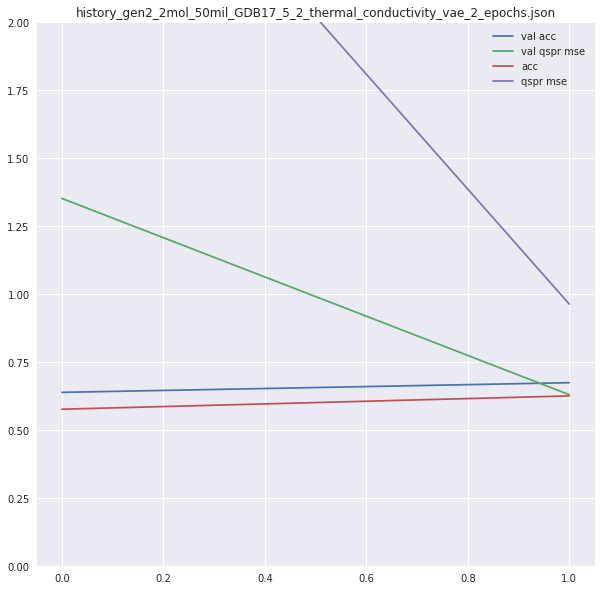

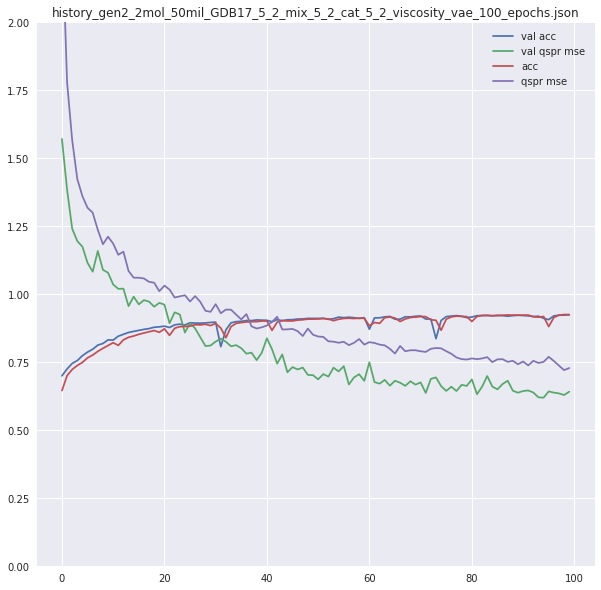

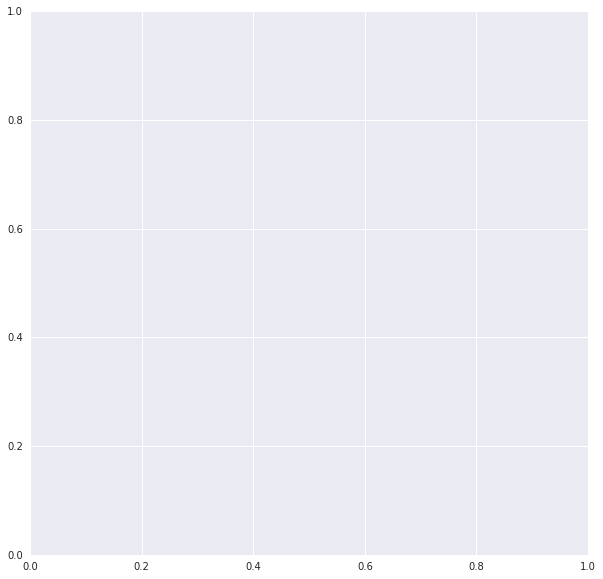

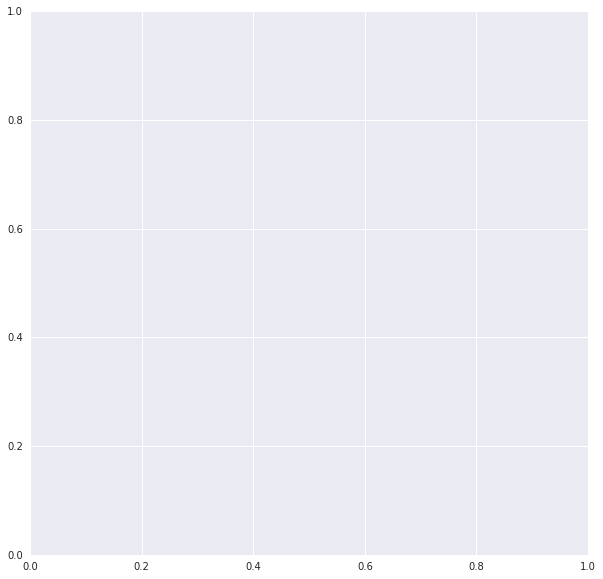

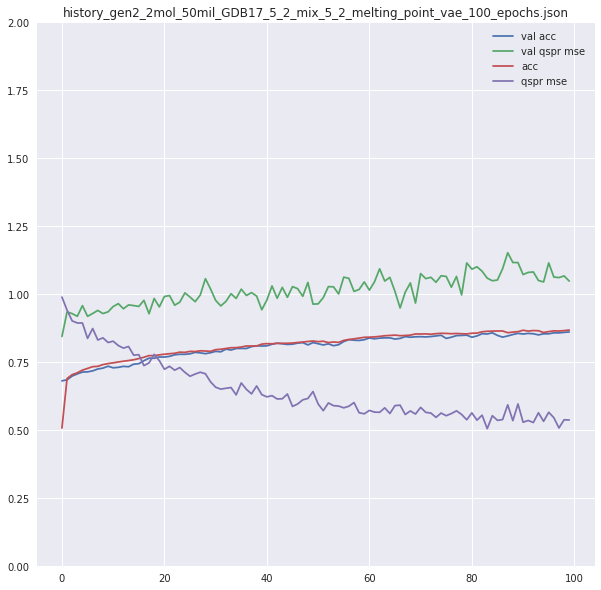

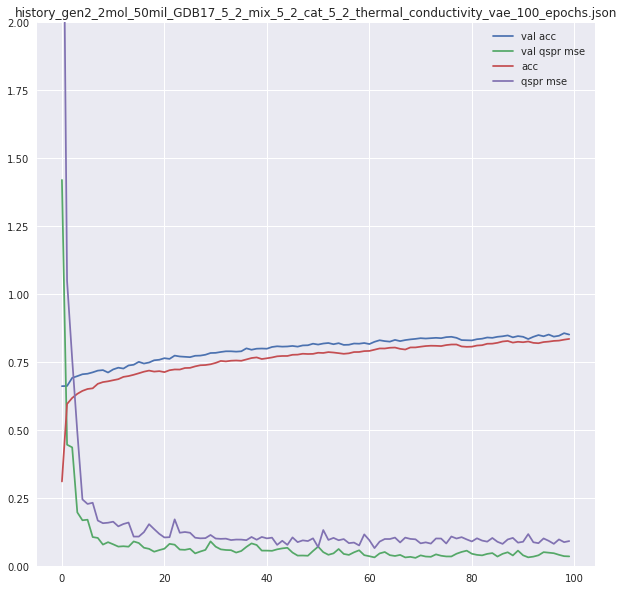

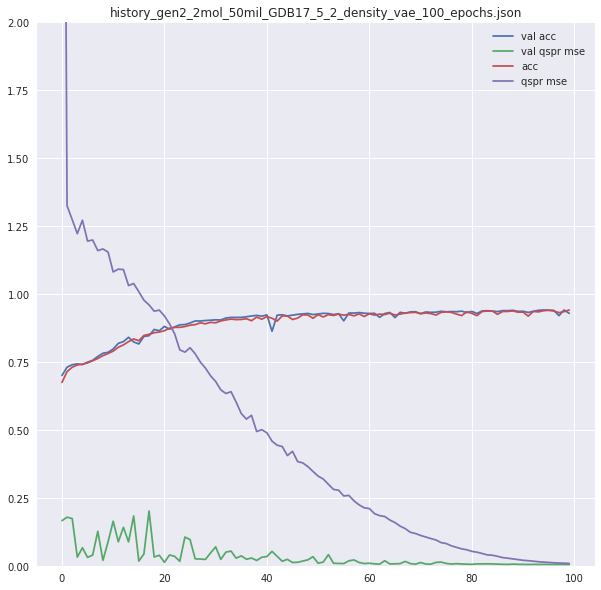

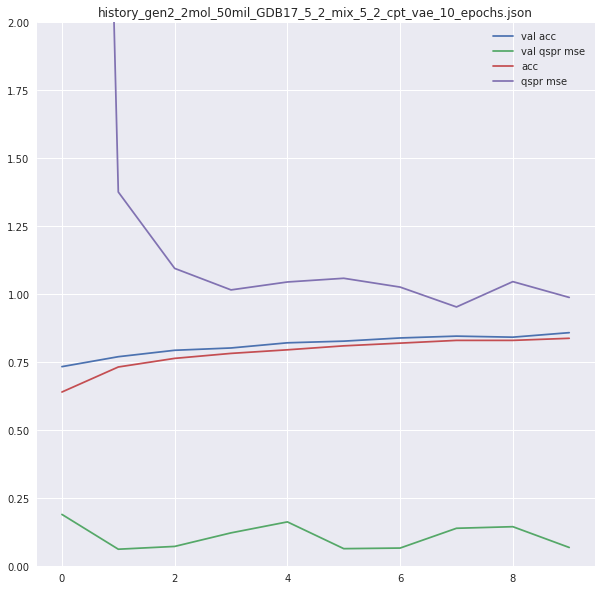

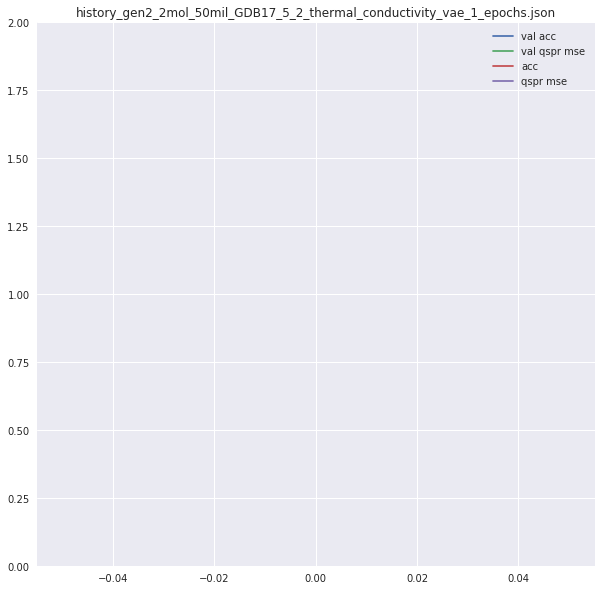

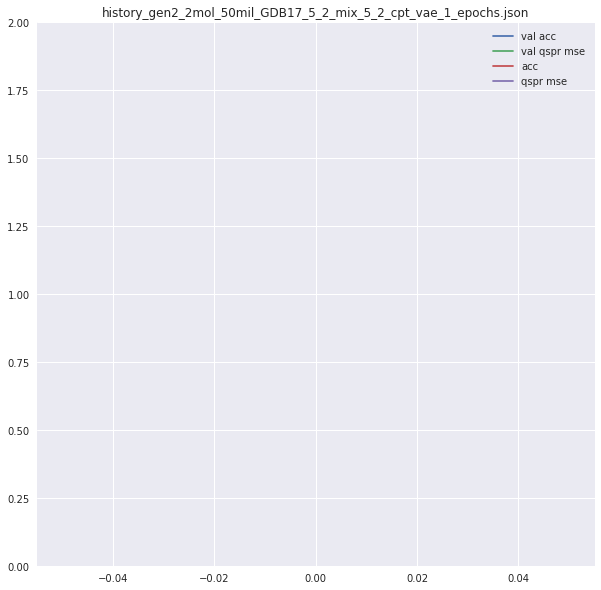

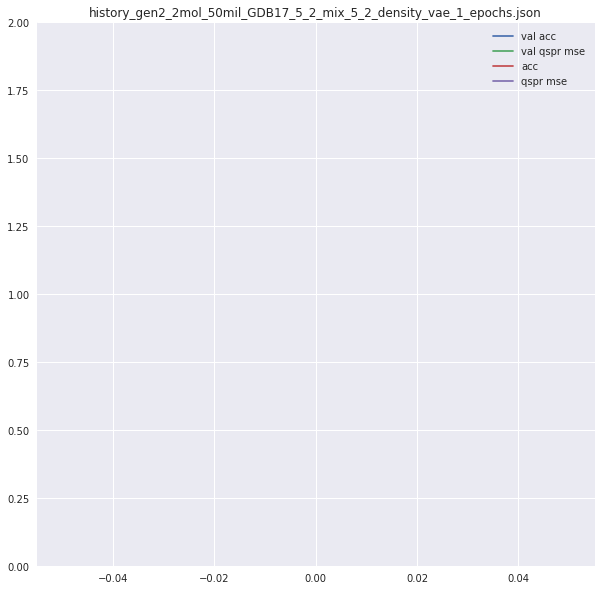

In [40]:
for key, item in enumerate(histories):
    try:
        print(histories[key])
        f = open("{}".format(histories[key]),"r")
        history = json.loads(f.read())

        fig, ax = plt.subplots(1, figsize=(10,10))
        ax.plot(history['val_decoded_mean_acc'], label='val acc')
        ax.plot(history['val_qspr_mean_squared_error'], label ='val qspr mse')
        ax.plot(history['decoded_mean_acc'], label = 'acc')
        ax.plot(history['qspr_mean_squared_error'], label='qspr mse')
        ax.set_ylim(0,2)
        ax.set_title(item)
        ax.legend()
    except:pass